In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy.ma as ma
from scipy import misc, signal, ndimage, sqrt, stats, misc, signal
from astropy.io import fits
import math
import pandas as pd
from scipy.optimize import leastsq
#from lmircam_tools import junk_process_readout
#% matplotlib inline

In [2]:
stem = ('/home/../../Volumes/seagate_external_drive/'+\
        'lbti_data_reduction/181223_fizeau_grism_tests/')

In [3]:
# set some approximate parameters of the observed grism PSF

sig = 5 # sigma of Gaussian profile in x
length_y = 200 # length in y of the psf

In [4]:
# get background

imagebgCube, header = fits.getdata(stem + 'lm_181223_'+str("{:0>6d}".format(1373))+'.fits',0,header=True)
imagebg = imagebgCube[0,:,:]

In [8]:
#####################################################
# THE PART BELOW IS NEW

In [9]:
# take FFT
# if no direction of fringes is apparent --> dial one way 10 microns, then jump back and go the other way 10 microns
# if direction of fringes is apparent --> dial OPD to make them vertical

In [5]:
from matplotlib.colors import LogNorm

In [6]:
# ersatz
center_grism = [639,940]

In [9]:
# loop over sequence of grism images to make animation of how the FFT of the grism PSF changes

'''
for f in range(6950,7049):

    image, header = fits.getdata('images/lm_180507_'+
                                 str("{:0>6d}".format(f))+
                                 '.fits',
                                 0,
                                 header=True) 

    # cut out the grism image
    img_before_padding_before_FT = image[center_grism[0]-int(0.5*length_y):center_grism[0]+int(0.5*length_y),
                                     center_grism[1]-2*sig:center_grism[1]+2*sig]
    
    
    # take FFT
    
    # w/ padding
    #padI = np.pad(img_before_padding_before_FT,int(len(img_before_padding_before_FT)),'constant',constant_values=10) 
    # no padding
    padI = img_before_padding_before_FT

    PhaseExtract = np.fft.fft2(padI)
    PhaseExtract = np.fft.fftshift(PhaseExtract)

    AmpPE = np.absolute(PhaseExtract)
    ArgPE = np.angle(PhaseExtract)

    plt.subplot(1, 3, 1)
    plt.imshow(img_before_padding_before_FT, origin="lower", cmap="gray")   
    
    plt.subplot(1, 3, 2)
    plt.imshow(AmpPE, origin="lower", cmap="gray", norm=LogNorm())
    
    #plt.subplot(1, 4, 3)
    #plt.plot(np.sum(AmpPE, axis=1))
    
    plt.subplot(1, 3, 3)
    plt.semilogy(np.sum(AmpPE[:,int(0.5*img_before_padding_before_FT.shape[1]):], axis=1)) # use right-hand side of FFT image only    
    
    #frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticklabels([])
    
    #plt.tight_layout()
    
    plt.suptitle(str("{:0>6d}".format(f)))
    
    #plt.show()
    
    plt.savefig("images/psf_altair_ft_"+str("{:0>6d}".format(f))+".png", overwrite=False)
    plt.clf()
'''

'\nfor f in range(6950,7049):\n\n    image, header = fits.getdata(\'images/lm_180507_\'+\n                                 str("{:0>6d}".format(f))+\n                                 \'.fits\',\n                                 0,\n                                 header=True) \n\n    # cut out the grism image\n    img_before_padding_before_FT = image[center_grism[0]-int(0.5*length_y):center_grism[0]+int(0.5*length_y),\n                                     center_grism[1]-2*sig:center_grism[1]+2*sig]\n    \n    \n    # take FFT\n    \n    # w/ padding\n    #padI = np.pad(img_before_padding_before_FT,int(len(img_before_padding_before_FT)),\'constant\',constant_values=10) \n    # no padding\n    padI = img_before_padding_before_FT\n\n    PhaseExtract = np.fft.fft2(padI)\n    PhaseExtract = np.fft.fftshift(PhaseExtract)\n\n    AmpPE = np.absolute(PhaseExtract)\n    ArgPE = np.angle(PhaseExtract)\n\n    plt.subplot(1, 3, 1)\n    plt.imshow(img_before_padding_before_FT, origin="lower", cmap

In [10]:
image, header = fits.getdata('./fits_files/lm_181223_'+str("{:0>6d}".format(1374))+'.fits',0,header=True)

In [11]:
np.shape(image[0,:,:])

(1024, 2048)

In [7]:
def find_airy_psf(image):
    if True:

        #imageThis = numpy.copy(image)

        '''
        if (PSFside == 'left'):
            imageThis[:,1024:-1] = 0
        elif (PSFside == 'right'):
            imageThis[:,0:1024] = 0
        '''

        image[np.isnan(image)] = np.nanmedian(image) # if there are NaNs, replace them with the median image value
        #imageG = ndimage.gaussian_filter(image, 6) # further remove effect of bad pixels (somewhat redundant?)
        imageG = image # further remove effect of bad pixels (somewhat redundant?)
        loc = np.argwhere(imageG==imageG.max())
        cx = loc[0,1]
        cy = loc[0,0]

        #plt.imshow(imageG, origin="lower")
        #
        #plt.scatter([cx,cx],[cy,cy], c='r', s=50)
        #plt.colorbar()
        #plt.show()
        #print [cy, cx] # check

    return [cy, cx]

1420
2.309062789025683
1421
1.6090089060473984
1422
1.5823539226186094
1423
-28.48583608976696


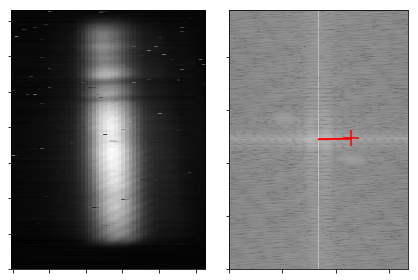

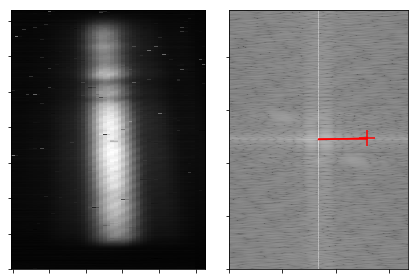

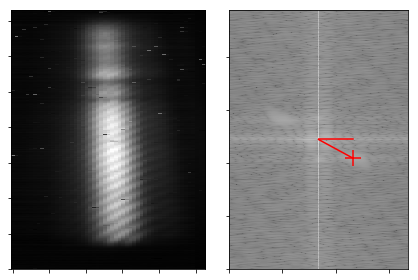

1424
-27.814293855775233


<Figure size 432x288 with 0 Axes>

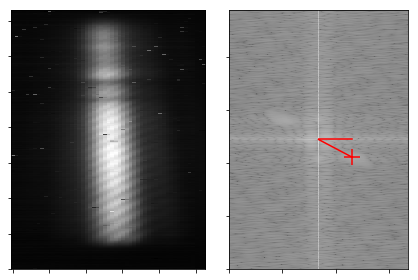

1425
1.9480850065149493
1426
-25.99401580396322


<Figure size 432x288 with 0 Axes>

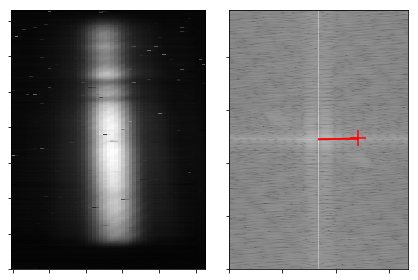

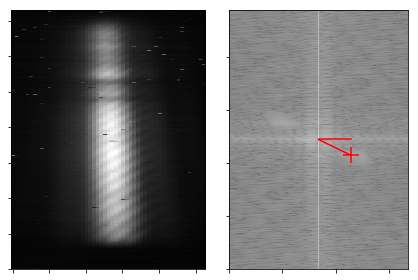

1427
-25.641005824305285


<Figure size 432x288 with 0 Axes>

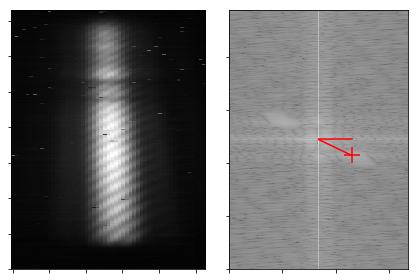

1428
-25.426874169589805


<Figure size 432x288 with 0 Axes>

1429
-22.619864948040426


<Figure size 432x288 with 0 Axes>

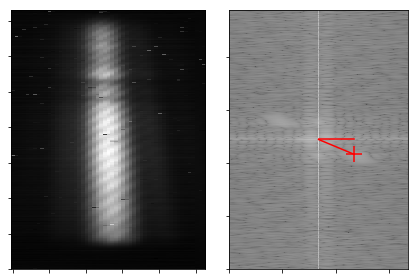

1430
-22.045913462371523


<Figure size 432x288 with 0 Axes>

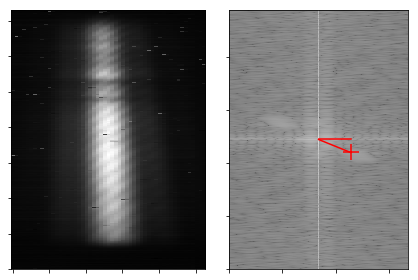

1431
-19.707978842978722


<Figure size 432x288 with 0 Axes>

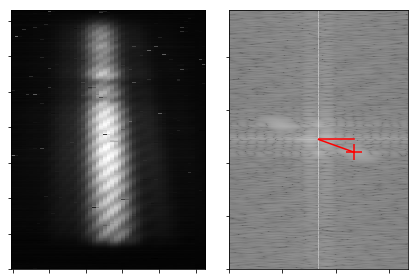

1432
-18.68191186034826


<Figure size 432x288 with 0 Axes>

1433
-18.935335921714245


<Figure size 432x288 with 0 Axes>

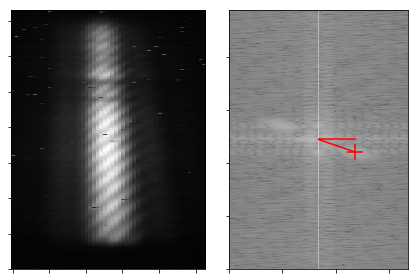

1434
-16.927513064147043


<Figure size 432x288 with 0 Axes>

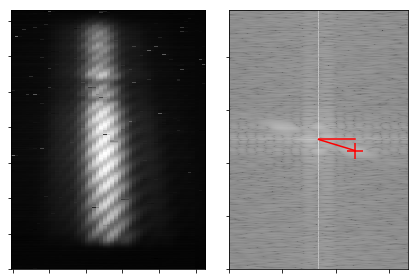

1435
-15.083059822329894


<Figure size 432x288 with 0 Axes>

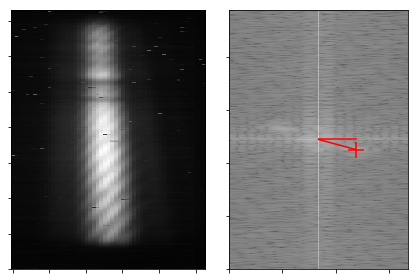

1436
-14.506641597524334


<Figure size 432x288 with 0 Axes>

1437
-13.937797208254239


<Figure size 432x288 with 0 Axes>

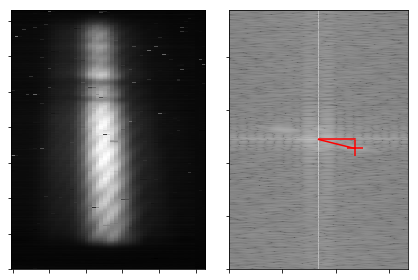

1438
-12.932608396739514


<Figure size 432x288 with 0 Axes>

1439
-10.030213319732836


<Figure size 432x288 with 0 Axes>

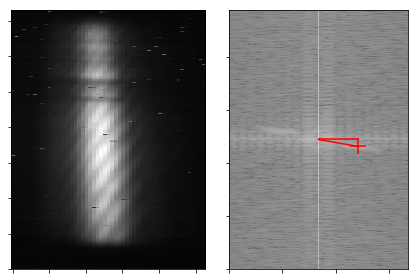

1440
-12.225122675735753


<Figure size 432x288 with 0 Axes>

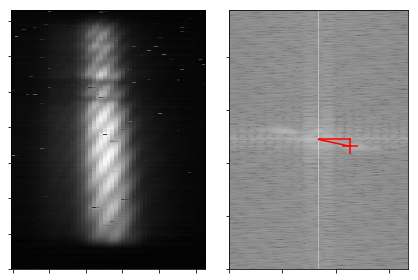

1441
-9.769700050531238


<Figure size 432x288 with 0 Axes>

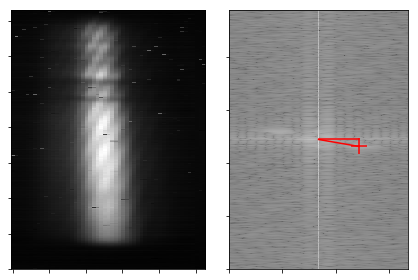

1442
-7.3523793598923595


<Figure size 432x288 with 0 Axes>

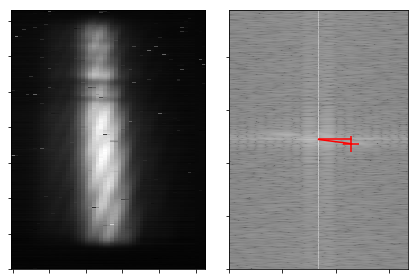

1443
-7.3523793598923595


<Figure size 432x288 with 0 Axes>

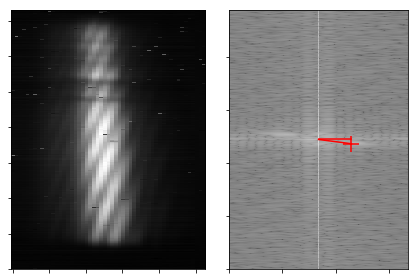

1444
-6.390495314646983


<Figure size 432x288 with 0 Axes>

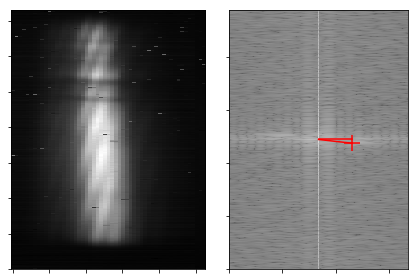

1445
-4.028263666485141


<Figure size 432x288 with 0 Axes>

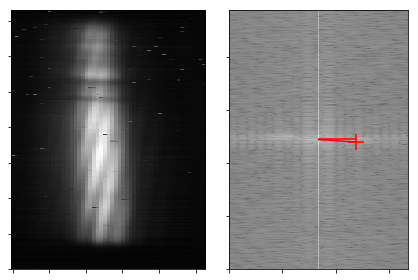

1446
-4.15128526642169


<Figure size 432x288 with 0 Axes>

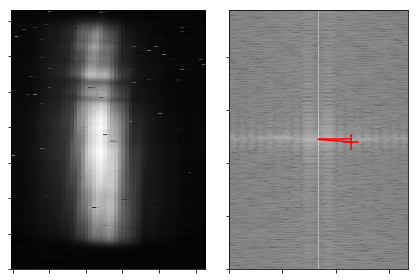

1447
3.231009900368214
1448
3.130244862219096
1449
3.344650318265879
1450
6.788974574438791


<Figure size 432x288 with 0 Axes>

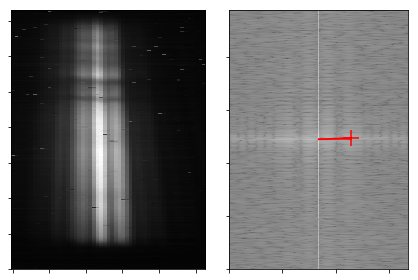

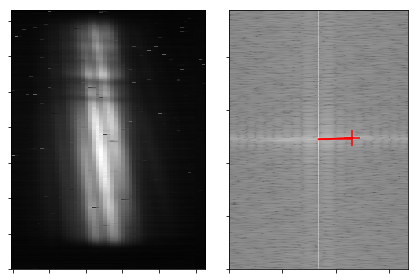

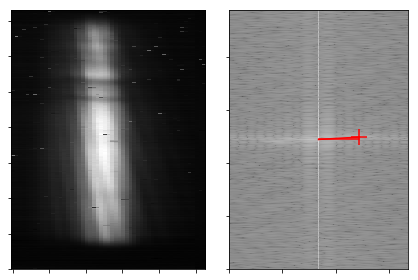

1451
7.806400829235755


<Figure size 432x288 with 0 Axes>

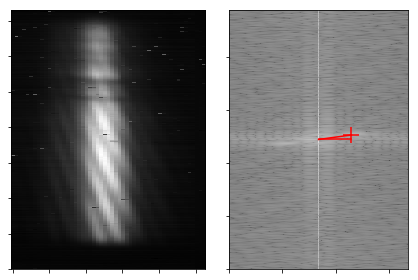

1452
10.06068979532297


<Figure size 432x288 with 0 Axes>

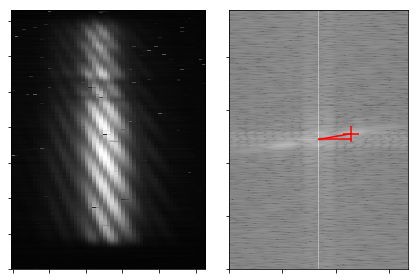

1453
13.431028870681669


<Figure size 432x288 with 0 Axes>

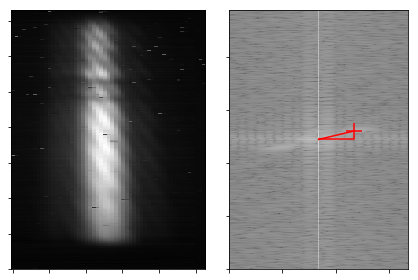

1454
13.70696100407981


<Figure size 432x288 with 0 Axes>

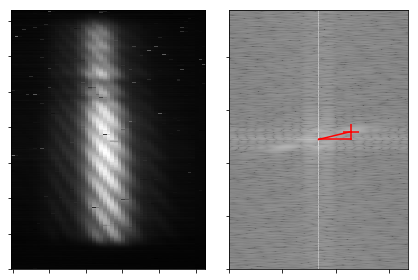

1455
15.037815903582251


<Figure size 432x288 with 0 Axes>

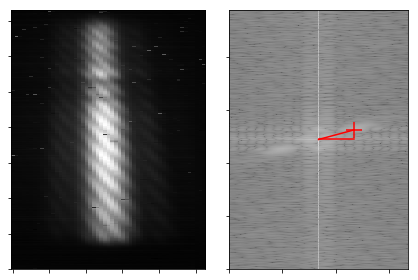

1456
17.300527191945005


<Figure size 432x288 with 0 Axes>

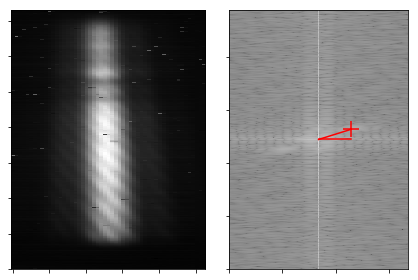

1457
20.05609473657542


<Figure size 432x288 with 0 Axes>

1458
22.21759426951831


<Figure size 432x288 with 0 Axes>

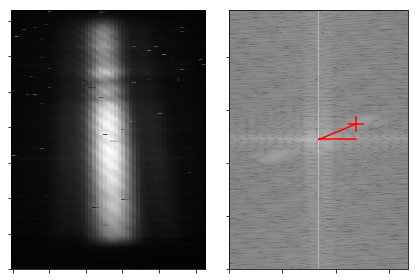

1459
22.774969548886443


<Figure size 432x288 with 0 Axes>

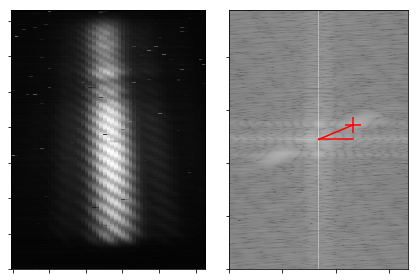

1460
24.94390526342458


<Figure size 432x288 with 0 Axes>

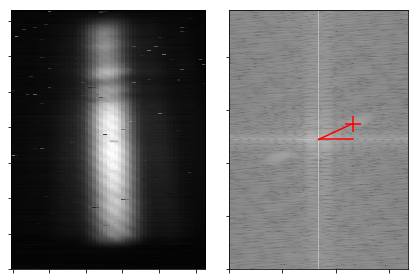

1461
26.053495310490952


<Figure size 432x288 with 0 Axes>

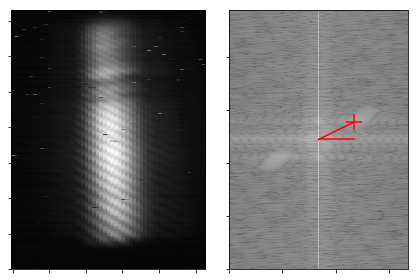

1462
2.309062789025683
1463
1.9614176677703405
1464
2.309062789025683
1465
3.678238721993387
1466
2.7079174858661985
1467
2.520827907710173
1468
2.6897703231504724
1469
2.8421378836556643
1470
2.5050928672413995
1471
2.7830207538566145
1472
2.8624052261117474
1473
2.9464473800123296
1474
2.7638573709125587
1475
2.6025622024998065
1476
3.661935575519803
1477
2.8829634525395402
1478
3.3419438572611337
1479
4.114909098237253


<Figure size 432x288 with 0 Axes>

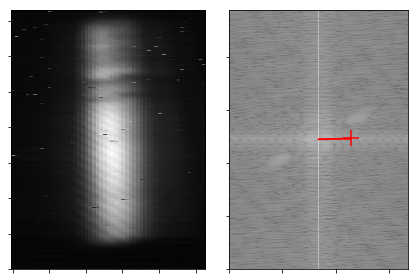

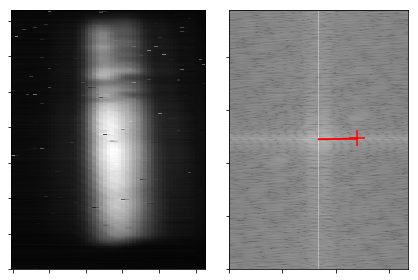

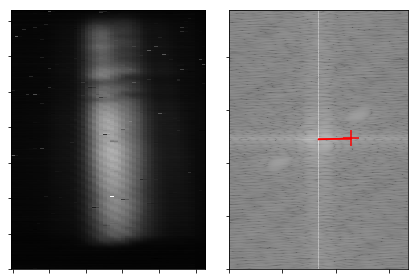

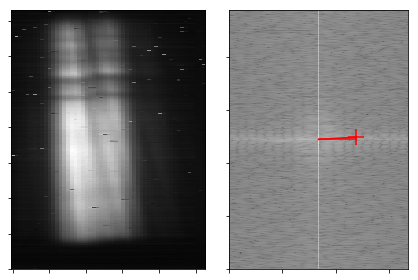

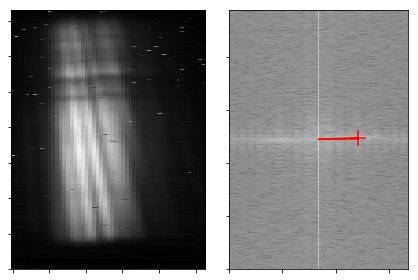

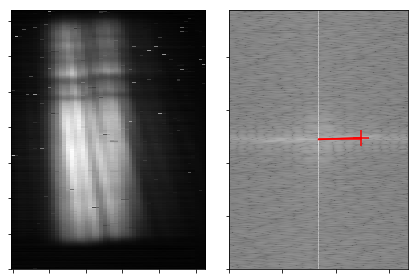

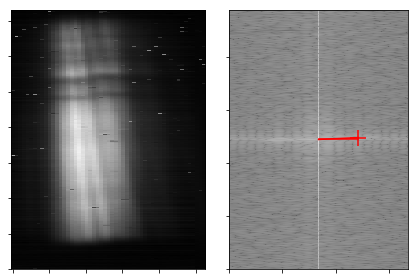

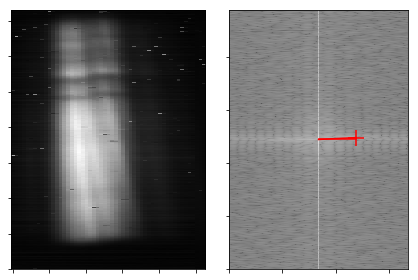

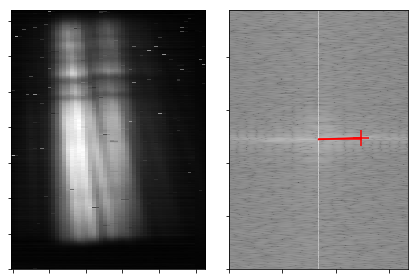

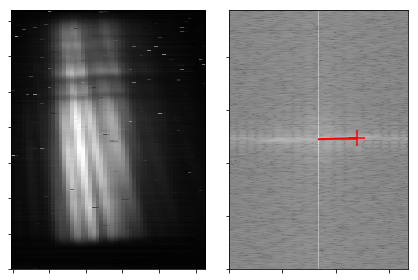

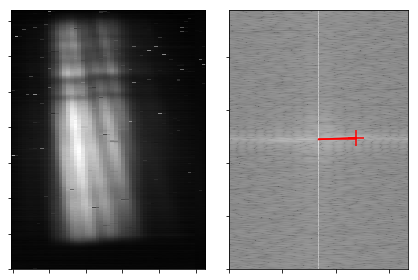

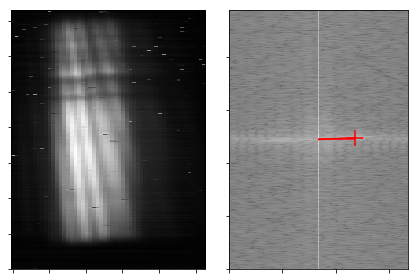

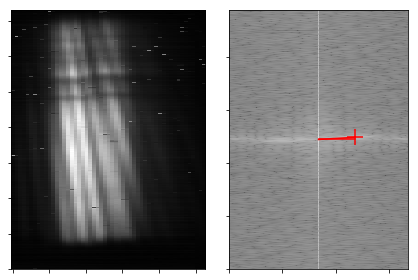

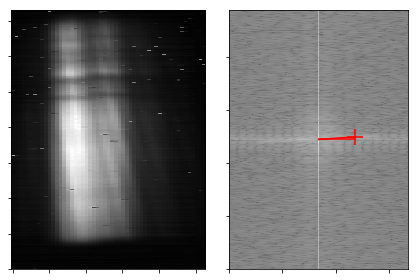

In [8]:
# loop over sequence of grism images to make animation of how the residuals of parts of the FFT of the grism PSF changes 

angleArray = []
frameArray = []
plArray = []

for f in range(1420,1480):
#for f in range(1431,1432):

    imageCube, header = fits.getdata(stem + 'lm_181223_'+
                                     str("{:0>6d}".format(f))+'.fits',
                                 0,
                                 header=True) 
    
    imgb4 = imageCube[1,:,:]
    
    # simple background subtraction
    image = np.subtract(imgb4,imagebg)

    # cut out the grism image
    img_before_padding_before_FT = image[483:809,923:943]
    '''
    img_before_padding_before_FT = image[center_grism[0]-int(0.5*length_y):center_grism[0]+int(0.5*length_y),
                                     center_grism[1]-2*sig:center_grism[1]+2*sig]
    '''
    
    
    # take FFT
    
    # w/ padding
    padI = np.pad(img_before_padding_before_FT,int(len(img_before_padding_before_FT)),'median') 
    # no padding
    #padI = img_before_padding_before_FT

    PhaseExtract = np.fft.fft2(padI)
    PhaseExtract = np.fft.fftshift(PhaseExtract)

    AmpPE = np.absolute(PhaseExtract)
    ArgPE = np.angle(PhaseExtract)
    
    center_masked_data = np.array(AmpPE.data)
    
    center_masked_data[:,:400] = np.nan
    center_masked_data[int(0.5*np.shape(center_masked_data)[0])-5:int(0.5*np.shape(center_masked_data)[0])+5,:] = np.nan
    center_masked_data[int(0.5*np.shape(center_masked_data)[0])-20:int(0.5*np.shape(center_masked_data)[0])+20,:460] = np.nan
    
    dot_loc = find_airy_psf(center_masked_data)
    
    y_comp = dot_loc[0]-0.5*np.shape(center_masked_data)[0]
    x_comp = dot_loc[1]-0.5*np.shape(center_masked_data)[1]
    angle_val = math.atan2(y_comp,x_comp)*180./np.pi
    
    print(f)
    print(angle_val)
    
    fig,ax = plt.subplots(1,2)
    
    ax[0].imshow(image[463:829,910:963], origin="lower", interpolation='nearest', aspect='auto', cmap="gray")
    
    #ax[0].annotate("3", xy=(0,0), xytext=(6,300), color="k", fontsize=20, 
    #             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))
    
    ax[0].set_yticklabels([])
    ax[0].set_xticklabels([])
    
    ax[1].imshow(AmpPE.data, norm=LogNorm(), origin="lower", cmap="gray", alpha=0.7)
    ax[1].scatter(dot_loc[1], dot_loc[0], color="r", marker="+", s=250)
    
    # show angle
    ax[1].plot([int(0.5*np.shape(center_masked_data)[1]),dot_loc[1]],
                  [int(0.5*np.shape(center_masked_data)[0]),dot_loc[0]], color="red")
    ax[1].plot([int(0.5*np.shape(center_masked_data)[1]),dot_loc[1]],
                  [int(0.5*np.shape(center_masked_data)[0]),int(0.5*np.shape(center_masked_data)[0])], color="red")
    
    ax[1].set_yticklabels([])
    ax[1].set_xticklabels([])
    
    plt.tight_layout()
    
    # skip bad data points
    if (angle_val > 0) and (angle_val < 5):
        continue
    
    frameArray = np.concatenate((frameArray,[f]))
    angleArray = np.concatenate((angleArray,[angle_val]))
    plArray = np.concatenate((plArray,[int(header['SPCTRPOS'])]))

    plt.show()
    
    #plt.savefig("images/grism_angle_demo_"+str("{:0>6d}".format(f))+".png", overwrite=True)
    plt.clf()

In [ ]:
plArray

In [18]:
optimize_func = lambda x: x[0]*np.tan((x[1]*angleArray + x[2])*np.pi/180.) + x[3] - plArray
guess_amp = 2000
guess_freq = 2.8
guess_phase = 0
guess_offset = 405000
est_amp, est_freq, est_ph, est_offset = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_offset])[0]
print(leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_offset])[0])

best_fit_abcissa1 = np.arange(-30,30)
best_fit_ordinate1 = est_amp*np.tan((est_freq*best_fit_abcissa1 + est_ph)*np.pi/180.) + est_offset

[ 9.09575040e+03  5.97605027e-01 -3.78055203e+01  4.12751782e+05]


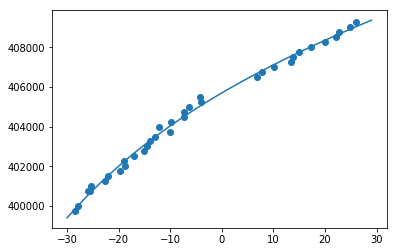

In [118]:
Am = 2000
Ph = 0
Fr = 2.8
Of = 405000
plt.scatter(angleArray, plArray)
#plt.scatter(angleArray, Am*np.tan((Fr*angleArray + Ph)*np.pi/180.) + Of)
plt.plot(best_fit_abcissa1, best_fit_ordinate1)
plt.show()

In [11]:
optimize_func = lambda x: x[0]*np.tan((1*angleArray)*np.pi/180.) + x[1] - plArray
guess_amp = 2000
#guess_freq = 2.8
#guess_phase = 0
guess_offset = 405000
est_amp, est_offset = leastsq(optimize_func, [guess_amp, guess_offset])[0]
print(leastsq(optimize_func, [guess_amp, guess_offset])[0])

best_fit_abcissa2 = np.arange(-30,30)
best_fit_ordinate2 = est_amp*np.tan((1*best_fit_abcissa2)*np.pi/180.) + est_offset

[  8921.13146002 405295.16299997]


In [64]:
#import pandas as pd
#df = pd.DataFrame(np.transpose([np.transpose(frameArray),np.transpose(angleArray),np.transpose(plArray)]), 
#                  columns=["frameArray","angleArray","plArray"])

In [66]:
df.to_csv("sample_grism_data_dec2018.dat")

In [12]:
df = pd.read_csv("sample_grism_data_dec2018.dat")

In [13]:
print(df)

    Unnamed: 0  frameArray  angleArray   plArray
0            0      1423.0  -28.485836  399750.0
1            1      1424.0  -27.814294  400000.0
2            2      1426.0  -25.994016  400750.0
3            3      1427.0  -25.641006  400750.0
4            4      1428.0  -25.426874  401000.0
5            5      1429.0  -22.619865  401250.0
6            6      1430.0  -22.045913  401500.0
7            7      1431.0  -19.707979  401750.0
8            8      1432.0  -18.681912  402000.0
9            9      1433.0  -18.935336  402250.0
10          10      1434.0  -16.927513  402500.0
11          11      1435.0  -15.083060  402750.0
12          12      1436.0  -14.506642  403000.0
13          13      1437.0  -13.937797  403250.0
14          14      1438.0  -12.932608  403500.0
15          15      1439.0  -10.030213  403750.0
16          16      1440.0  -12.225123  404000.0
17          17      1441.0   -9.769700  404250.0
18          18      1442.0   -7.352379  404500.0
19          19      

[399401.06385261 399695.82349412 399981.88709464 400259.69345133
 400529.65289573]
[15.97604255 15.98783294 15.99927548 16.01038774 16.02118612]


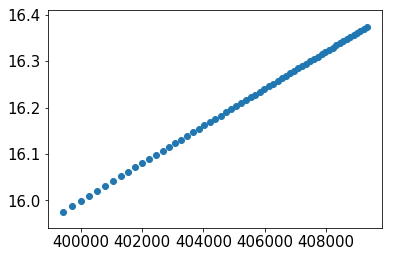

In [17]:
print(best_fit_ordinate1[0:5])
print(abcissa_opd_mm[0:5])
plt.scatter(best_fit_ordinate1,abcissa_opd_mm)

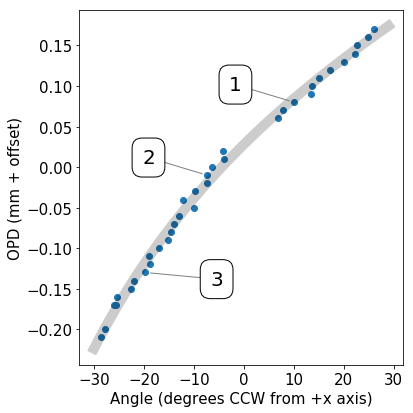

In [30]:
Am = 2000
Ph = 0
Fr = 2.8
Of = 405000
plt.figure(figsize=(6,6))

# conversion from motor counts to OPD
# 50,000 motor counts = 1mm mirror movement -> 2 mm OPD
# ergo: abcissa_opd_mm = np.divide(2*best_fit_ordinate1_motor,50000)
best_fit_ordinate_opd_mm1 = np.divide(2*np.subtract(best_fit_ordinate1,Of),50000)
plArray_mm = np.divide(2*np.subtract(plArray,Of),50000)

plt.plot(best_fit_abcissa1, best_fit_ordinate_opd_mm1, color="k", alpha=0.2, linewidth=10)

#xy_1 = [10.060690,407000.0-Of]
xy_1 = [10.060690,np.divide(2*np.subtract(407000.0,Of),50000)]
plt.annotate("1", xy=xy_1, xytext=(xy_1[0]-13,xy_1[1]+0.015), color="k", fontsize=20, alpha=1, 
             arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None), 
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))
xy_2 = [-7.352379,np.divide(2*np.subtract(404750.0,Of),50000)]
plt.annotate("2", xy=xy_2, xytext=(xy_2[0]-13,xy_2[1]+0.015), color="k", fontsize=20, alpha=1, 
             arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None), 
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))
xy_3 = [-19.707979,np.divide(2*np.subtract(401750.0,Of),50000)]
plt.annotate("3", xy=xy_3, xytext=(xy_3[0]+13,xy_3[1]-0.015), color="k", fontsize=20, alpha=1, 
             arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None), 
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))

plt.scatter(angleArray, plArray_mm)
#plt.scatter(angleArray, Am*np.tan((Fr*angleArray + Ph)*np.pi/180.) + Of)
#plt.plot(best_fit_abcissa2, best_fit_ordinate2, color="r")
plt.xlabel("Angle (degrees CCW from +x axis)")
plt.ylabel("OPD (mm + offset)")
plt.rcParams.update({'font.size': 15})
plt.tight_layout()

#plt.show()

plt.savefig("grism_angle2.pdf")